<a href="https://www.kaggle.com/code/game1g/weather2?scriptVersionId=217549192" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

分析時間：2025-01-14 11:15:44 UTC+8
分析者：jeanbomb

成功載入數據！總共有 46,967 筆資料

=== 數據分析 ===

溫度 (°C)統計：
平均值：23.3
最大值：49.2
最小值：-24.8

濕度 (%)統計：
平均值：63.1
最大值：100.0
最小值：2.0

風速 (km/h)統計：
平均值：13.4
最大值：2963.2
最小值：3.6


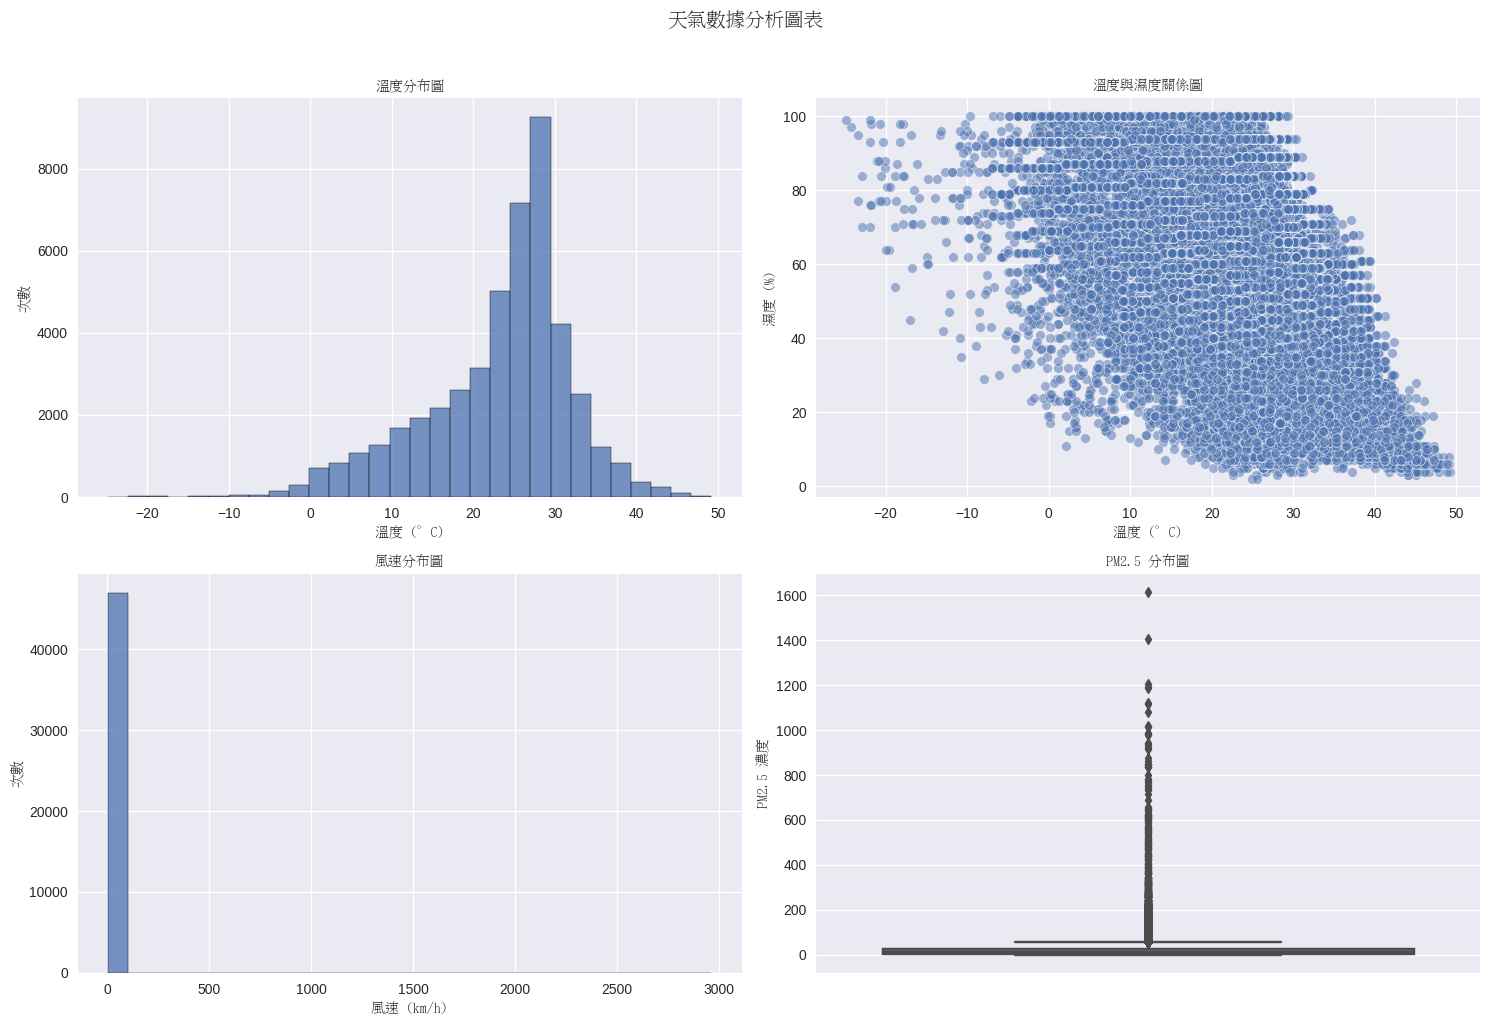


=== 準備機器學習數據 ===
訓練數據：37,573 筆
測試數據：9,394 筆

=== 開始訓練模型 ===
Epoch 1/20
940/940 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 308.2014 - mae: 13.6173 - val_loss: 132.3063 - val_mae: 1.7487
Epoch 2/20
940/940 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20.2631 - mae: 3.4420 - val_loss: 56.3083 - val_mae: 1.2434
Epoch 3/20
940/940 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17.6382 - mae: 3.1749 - val_loss: 15.0406 - val_mae: 1.1150
Epoch 4/20
940/940 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16.1271 - mae: 3.0133 - val_loss: 9.9405 - val_mae: 1.1457
Epoch 5/20
940/940 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.1893 - mae: 2.9273 - val_loss: 3.0385 - val_mae: 1.0101
Epoch 6/20
940/940 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.6688 - mae: 2.8752 - val_loss: 3.4501 - val_mae: 0.9753
Epoch 7/20
940/940 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13.7506 - mae: 2.7905 - val_loss: 3.0204 - val_mae: 1.1344
Epoch 8/20
940/940 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.9682 - mae: 2.6928 - val_loss: 2.7102

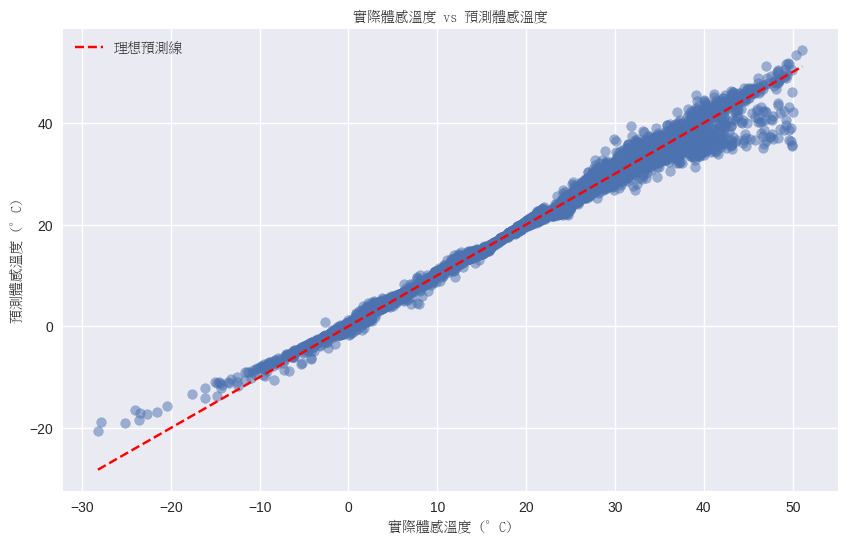

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

分析完成！報告已儲存至 'weather_report.txt'


In [1]:
"""
天氣數據分析與預測專案 (含機器學習)
目標：分析天氣數據並使用深度學習預測體感溫度
作者：jeanbomb
日期：2025-01-14
"""

# 1. 導入必要的套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from datetime import datetime
import pytz  # 時區處理
from matplotlib.font_manager import FontProperties
import warnings
warnings.filterwarnings('ignore')  # 隱藏警告訊息

# 獲取台北時間
def get_taipei_time():
    """取得台北時間（UTC+8）"""
    taipei_tz = pytz.timezone('Asia/Taipei')
    utc_time = datetime.utcnow()
    taipei_time = utc_time.replace(tzinfo=pytz.UTC).astimezone(taipei_tz)
    return taipei_time
    
# 2. 設定中文字體
font = FontProperties(fname='/kaggle/input/fontchinese/Open_Data/Fonts/TW-Sung-98_1.ttf')

# 3. 定義資料分析函數
def analyze_weather_data(df):
    """分析天氣數據並顯示基本統計資訊"""
    stats = {
        '溫度 (°C)': df['temperature_celsius'],
        '濕度 (%)': df['humidity'],
        '風速 (km/h)': df['wind_kph']
    }
    
    for name, data in stats.items():
        print(f"\n{name}統計：")
        print(f"平均值：{data.mean():.1f}")
        print(f"最大值：{data.max():.1f}")
        print(f"最小值：{data.min():.1f}")

# 4. 定義視覺化函數
def create_visualizations(df):
    """創建視覺化圖表"""
    plt.style.use('seaborn')
    
    # 創建 2x2 的圖表
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('天氣數據分析圖表', fontproperties=font, fontsize=14, y=1.02)

    # 溫度分布圖
    sns.histplot(data=df, x='temperature_celsius', bins=30, ax=axes[0,0])
    axes[0,0].set_title('溫度分布圖', fontproperties=font)
    axes[0,0].set_xlabel('溫度 (°C)', fontproperties=font)
    axes[0,0].set_ylabel('次數', fontproperties=font)

    # 溫度與濕度關係圖
    sns.scatterplot(data=df, x='temperature_celsius', y='humidity', 
                   alpha=0.5, ax=axes[0,1])
    axes[0,1].set_title('溫度與濕度關係圖', fontproperties=font)
    axes[0,1].set_xlabel('溫度 (°C)', fontproperties=font)
    axes[0,1].set_ylabel('濕度 (%)', fontproperties=font)

    # 風速分布圖
    sns.histplot(data=df, x='wind_kph', bins=30, ax=axes[1,0])
    axes[1,0].set_title('風速分布圖', fontproperties=font)
    axes[1,0].set_xlabel('風速 (km/h)', fontproperties=font)
    axes[1,0].set_ylabel('次數', fontproperties=font)

    # PM2.5 分布圖
    sns.boxplot(data=df, y='air_quality_PM2.5', ax=axes[1,1])
    axes[1,1].set_title('PM2.5 分布圖', fontproperties=font)
    axes[1,1].set_ylabel('PM2.5 濃度', fontproperties=font)

    plt.tight_layout()
    plt.show()

# 5. 定義模型創建函數
def create_model(input_shape):
    """建立深度學習模型"""
    model = keras.Sequential([
        keras.layers.Input(shape=input_shape),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1)
    ])
    
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    
    return model

# 6. 主程式
try:
    # 顯示基本信息
    current_time = get_taipei_time()
    print(f"分析時間：{current_time.strftime('%Y-%m-%d %H:%M:%S')} UTC+8")
    print(f"分析者：jeanbomb\n")

    # 載入數據
    df = pd.read_csv('/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv')
    print(f"成功載入數據！總共有 {len(df):,} 筆資料")

    # 資料分析
    print("\n=== 數據分析 ===")
    analyze_weather_data(df)
    create_visualizations(df)

    # 準備機器學習數據
    print("\n=== 準備機器學習數據 ===")
    features = ['temperature_celsius', 'humidity', 'wind_kph']
    target = 'feels_like_celsius'

    X = df[features]
    y = df[target]

    # 分割數據
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print(f"訓練數據：{len(X_train):,} 筆")
    print(f"測試數據：{len(X_test):,} 筆")

    # 標準化數據
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 訓練模型
    print("\n=== 開始訓練模型 ===")
    model = create_model(input_shape=(len(features),))
    
    # 設定早停機制
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # 訓練過程
    history = model.fit(
        X_train_scaled, y_train,
        epochs=20,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # 評估模型
    test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"\n模型評估結果：平均誤差 {test_mae:.2f}°C")

    # 預測結果視覺化
    y_pred = model.predict(X_test_scaled)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--',
        label='理想預測線'
    )
    plt.title('實際體感溫度 vs 預測體感溫度', fontproperties=font)
    plt.xlabel('實際體感溫度 (°C)', fontproperties=font)
    plt.ylabel('預測體感溫度 (°C)', fontproperties=font)
    plt.legend(prop=font)
    plt.show()

    # 測試實際案例
    test_temp = 25     # 溫度25度
    test_humidity = 60 # 濕度60%
    test_wind = 10     # 風速10km/h

    test_data = np.array([[test_temp, test_humidity, test_wind]])
    test_data_scaled = scaler.transform(test_data)
    predicted_feels_like = model.predict(test_data_scaled)[0][0]

    # 生成報告
    report = f"""
天氣分析報告
生成時間：{current_time.strftime('%Y-%m-%d %H:%M:%S')} UTC+8
分析者：jeanbomb

數據摘要：
- 總資料數：{len(df):,} 筆
- 平均溫度：{df['temperature_celsius'].mean():.1f}°C
- 平均濕度：{df['humidity'].mean():.1f}%
- 平均風速：{df['wind_kph'].mean():.1f} km/h

模型表現：
- 平均預測誤差：{test_mae:.2f}°C

實際預測示例：
- 輸入條件：
  * 溫度：{test_temp}°C
  * 濕度：{test_humidity}%
  * 風速：{test_wind} km/h
- 預測體感溫度：{predicted_feels_like:.1f}°C

分析完成。
"""

    # 儲存報告
    with open('weather_report.txt', 'w', encoding='utf-8') as f:
        f.write(report)

    print("\n分析完成！報告已儲存至 'weather_report.txt'")

except Exception as e:
    print(f"\n發生錯誤：{str(e)}")
    print(f"錯誤位置：{e.__traceback__.tb_lineno}")